In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
from scipy import stats
from pandas.api.types import CategoricalDtype
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 150)

In [2]:
finaldf = pd.read_csv('/Users/Julia/Desktop/bootcamp/DC_capstone/finaldf.csv', low_memory=False)
finaldf.head()

,PRICE,SALE_DATE,SALE_NUM,QUALIFIED,QUADRANT,WARD,SQUARE,NBHD,SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,ZIPCODE,LATITUDE,LONGITUDE,X,Y,STYLE,STRUCT,USECODE,UNITS,STORIES,GRADE,CNDTN,LANDAREA,GBA,GBA_LIVING,YR_ORIGIN,YR_EXT,YR_RMDL,ROOMS,BEDRMS,BATHRMS,KITCHENS,HEAT,AC,FIREPLACES,ROOF,INTWALL,EXTWALL
0,1095000.0,2003-11-25,1.0,Q,NW,Ward 2,152,Old City 2,040 D Old City 2,4201,004201 2006,20009.0,38.914680,-77.040832,-77.040429,38.914881,3 Story,Row Inside,24.0,2.0,3.0,Very Good,Good,1680.0,2522.0,723.172363,1910.0,1972.0,1988.0,8.0,4.0,4.0,2.0,Warm Cool,Y,5.0,Metal- Sms,Hardwood,Common Brick
1,1602000.0,2006-07-12,1.0,Q,NW,Ward 2,152,Old City 2,040 D Old City 2,4201,004201 2006,20009.0,38.914683,-77.040629,-77.040429,38.914881,3 Story,Row Inside,24.0,2.0,3.0,Very Good,Good,1680.0,2484.0,723.172363,1900.0,1984.0,2003.0,8.0,5.0,3.5,2.0,Hot Water Rad,Y,3.0,Built Up,Hardwood,Common Brick
2,1050000.0,2011-09-29,1.0,Q,NW,Ward 2,152,Old City 2,040 D Old City 2,4201,004201 2005,20009.0,38.915408,-77.040129,-77.040429,38.914881,3 Story,Row Inside,24.0,2.0,3.0,Very Good,Average,1627.0,2401.0,723.172363,1906.0,1972.0,2011.0,8.0,4.0,3.5,2.0,Hot Water Rad,Y,1.0,Metal- Sms,Hardwood,Common Brick
3,1430000.0,2018-05-03,4.0,Q,NW,Ward 2,152,Old City 2,040 D Old City 2,4201,004201 2005,20009.0,38.915017,-77.039903,-77.040429,38.914881,2 Story,Row Inside,24.0,2.0,2.0,Above Average,Very Good,1424.0,1488.0,723.172363,1908.0,1967.0,2008.0,7.0,3.0,3.5,2.0,Warm Cool,Y,1.0,Built Up,Hardwood,Common Brick
4,1325000.0,2011-09-30,1.0,Q,NW,Ward 2,152,Old City 2,040 D Old City 2,4201,004201 2005,20009.0,38.915038,-77.039716,-77.040429,38.914881,2 Story,Row Inside,24.0,2.0,2.0,Above Average,Very Good,1815.0,2692.0,723.172363,1917.0,1967.0,2000.0,5.0,3.0,3.5,2.0,Warm Cool,Y,1.0,Metal- Sms,Hardwood,Stucco


In [3]:
collist = list(finaldf.columns)
for i in collist:
    print("The length of %s is %f and type is %s." % (i, len(finaldf[i].unique()), finaldf.dtypes[i]))

The length of PRICE is 12303.000000 and type is float64.
The length of SALE_DATE is 6496.000000 and type is object.
The length of SALE_NUM is 15.000000 and type is float64.
The length of QUALIFIED is 2.000000 and type is object.
The length of QUADRANT is 4.000000 and type is object.
The length of WARD is 8.000000 and type is object.
The length of SQUARE is 3122.000000 and type is int64.
The length of NBHD is 56.000000 and type is object.
The length of SUBNBHD is 122.000000 and type is object.
The length of CENSUS_TRACT is 176.000000 and type is int64.
The length of CENSUS_BLOCK is 3614.000000 and type is object.
The length of ZIPCODE is 24.000000 and type is float64.
The length of LATITUDE is 51974.000000 and type is float64.
The length of LONGITUDE is 52140.000000 and type is float64.
The length of X is 3122.000000 and type is float64.
The length of Y is 3122.000000 and type is float64.
The length of STYLE is 18.000000 and type is object.
The length of STRUCT is 7.000000 and type is o

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


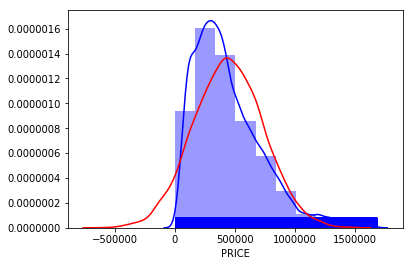

In [4]:
mean = finaldf.PRICE.mean()
sd = finaldf.PRICE.std()

norm = np.random.normal(size=10000, loc=mean, scale=sd)

# would want to do this after means of bootstrapping empirical data. 
# Don't use random sample for the normal distribution because we're using theoretical distribution. 

_ = sns.distplot(finaldf.PRICE, bins=10, rug=True, color='blue')
_ = sns.distplot(norm, hist=False, rug=False, color='red') 

In [5]:
#Shapiro-Wilk Test 
stat, p = stats.shapiro(finaldf.PRICE)
print('Statistic=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0).')
else:
    print('Sample does not look Gaussian (reject H0).')

### D’Agostino’s K^2 Test    
stat, p = stats.normaltest(finaldf.PRICE)
print('Statistic=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0).')
else:
    print('Sample does not look Gaussian (reject H0).')


Statistic=0.918, p=0.000
Sample does not look Gaussian (reject H0).
Statistic=16431.376, p=0.000
Sample does not look Gaussian (reject H0).


/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### TAKEAWAYS:
- The distribution of our data is not normal.

- We will use the Mann Whitney Wilcoxon test whether the distribution of charges differs for two categorical variables (minimum of 20 observations per category). 
  
- We will use the Kruskal-Wallis H-test to test whether the distribution of charges differ for more than two categorical variables (minimum 5 observations per category).
  
  
- We will use correlation statistics to determine the effect of continuous variables on charges. 
    - Levene’s test of homogeneity of variance
    - If variance is homogeneous, use Pearson correlation coefficient: test for linear relationship
    - If not, use test for monotonic relationship (variables shift in the same direction)
      - Spearman Rank correlation
      - Kendall Tau correlation
      

In [6]:
finaldf.SALE_DATE = pd.to_datetime(finaldf.SALE_DATE)
price_thousands = finaldf.PRICE / 1000

### SALE_DATE on PRICE:

In [7]:
early = min(finaldf['SALE_DATE'])
times = []
for i in finaldf['SALE_DATE']:
    num = i - early
    times.append(num.total_seconds())
    

Text(0.5, 1.0, 'Timeseries: Residential Housing Prices')

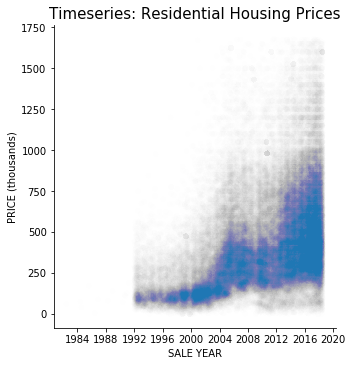

In [8]:
fdf = pd.DataFrame()
fdf['PRICE'] = finaldf['PRICE']
fdf['SALE_DATE'] = finaldf['SALE_DATE']
fdf.PRICE = fdf.PRICE / 1000

sns.relplot(x='SALE_DATE', y='PRICE', kind='scatter', data=fdf, ci='sd', **{'alpha': .005}, edgecolor='none')
plt.xlabel('SALE YEAR')
plt.ylabel('PRICE (thousands)')
plt.title("Timeseries: Residential Housing Prices" ,size=15)

Text(0.5, 1.0, 'Timeseries: Rolling Median Prices')

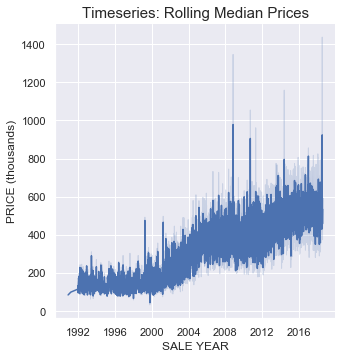

In [9]:
dtdf = finaldf.sort_values(by=(['SALE_DATE']))
rolmed = dtdf['PRICE'].rolling(12).median()
gdf = pd.DataFrame()
gdf['rolmed'] = rolmed
gdf['SALE_DATE'] = dtdf['SALE_DATE']
gdf = gdf.reset_index(drop=True)
gdf.rolmed = gdf.rolmed/1000

sns.set(rc={'figure.figsize':(20,20)})
sns.relplot(x="SALE_DATE", y="rolmed", kind="line", ci="sd", data=gdf)
plt.xlabel('SALE YEAR')
plt.ylabel('PRICE (thousands)')
plt.title("Timeseries: Rolling Median Prices" ,size=15)

Statistic=167954.877, p=0.000
Variance is not homogeneous (reject H0).
The correlation coefficient: 0.470 indicates a moderate monotonic relationship


Text(0, 0.5, 'PRICE IN THOUSANDS')

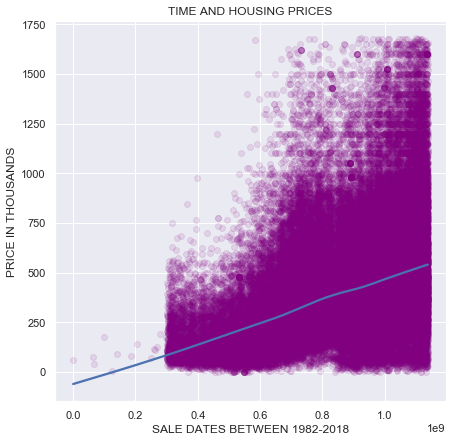

In [45]:
tdf = finaldf.copy()
tdf['TIME'] = times

#Test for homogeneity of variance:
stat, p = stats.levene(tdf['TIME'], tdf['PRICE'])
print('Statistic=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Variance is homogeneous (fail to reject H0).')
else:
    print('Variance is not homogeneous (reject H0).')
    
#Test for monotonic relationship:
r = tdf['PRICE'].corr(tdf['TIME'], method='spearman')
if r > .7:
    print("The correlation coefficient: %.3f indicates a strong monotonic relationship" % r) 
elif r > .3:
    print("The correlation coefficient: %.3f indicates a moderate monotonic relationship" % r) 
elif r > .1:
    print("The correlation coefficient: %.3f indicates a weak monotonic relationship" % r) 
elif r > -.1:
    print("The correlation coefficient: %.3f indicates a negligible monotonic relationship." % r) 
elif r > -.3:
    print("The correlation coefficient: %.3f indicates a weak monotonic relationship" % r)
elif r > -.7:
    print("The correlation coefficient: %.3f indicates a moderate monotonic relationship" % r) 
else:
    print("The correlation coefficient: %.3f indicates a strong monotonic relationship" % r)
 
plt.figure(figsize=(7, 7))
g = sns.regplot(x=tdf['TIME'], y=price_thousands,lowess=True, \
                 scatter_kws={'alpha':.1, 'color':'purple'}, fit_reg=True)
plt.title('TIME AND HOUSING PRICES')
plt.xlabel('SALE DATES BETWEEN 1982-2018')
plt.ylabel('PRICE IN THOUSANDS')


#### TAKEAWAYS:
* There is a moderate positive linear relationship of time and price. 

### QUALIFIED ON PRICES:

Text(0, 0.5, 'PRICE (THOUSANDS OF USD)')

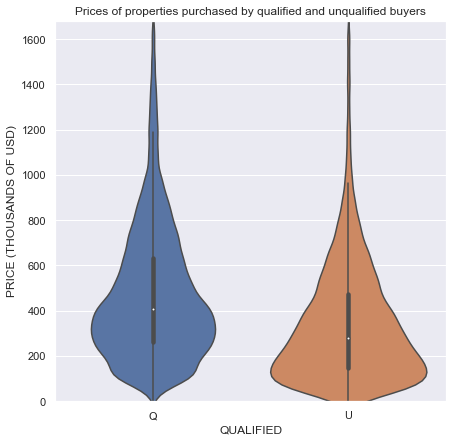

In [29]:
plt.figure(figsize=(7, 7))
g = sns.violinplot(x=finaldf.QUALIFIED, y=price_thousands)
g.set(ylim=(0, max(price_thousands)))
plt.title("Prices of properties purchased by qualified and unqualified buyers")
plt.ylabel('PRICE (THOUSANDS OF USD)')

In [12]:
stat, p = stats.mannwhitneyu(finaldf[(finaldf['QUALIFIED']=='Q')]['PRICE'], finaldf[(finaldf['QUALIFIED']=='U')]['PRICE'])
print('Statistic=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('The charge distributions are different between groups (fail to reject H0).')
else:
    print('The charge distributions are different between groups (reject H0).')

Statistic=483289132.500, p=0.000
The charge distributions are different between groups (reject H0).


#### TAKEAWAYS:
* Unqualified buyers generally buy lower priced properties
* The range of the value for properties purchased by qualified and unqualified buyers is the same

### QUADRANT AND PRICE

Text(0.5, 1.0, 'Prices of properties in various quadrants')

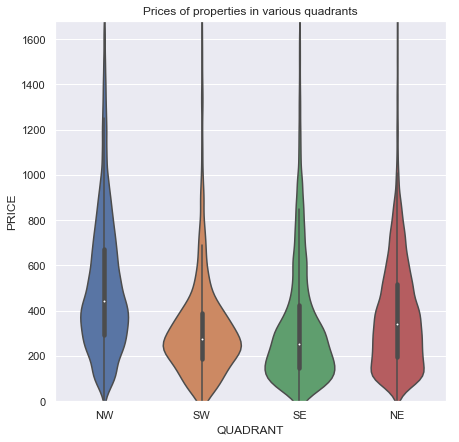

In [35]:
plt.figure(figsize=(7, 7))
g = sns.violinplot(x=finaldf.QUADRANT, y=price_thousands)
g.set(ylim=(0, max(price_thousands)))
plt.title("Prices of properties in various quadrants")

In [14]:
#Test for equal distribution:
stat, p = stats.kruskal(finaldf[(finaldf['QUADRANT']=='SE')]['PRICE'], finaldf[(finaldf['QUADRANT']=='SW')]['PRICE'], 
            finaldf[(finaldf['QUADRANT']=='NE')]['PRICE'], finaldf[(finaldf['QUADRANT']=='NW')]['PRICE'])
                        
print('Statistic=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('The charge distributions are different between groups (fail to reject H0).')
else:
    print('The charge distributions are different between groups (reject H0).')

Statistic=7559.823, p=0.000
The charge distributions are different between groups (reject H0).


#### TAKEAWAYS:
* Quadrants have an impact on price.
* SE generally has the lowest prices.
* NW generally has the highest prices.
* SW has the the most normal price distribution.

### SUBNEIGHBORHOOD, WARD AND PRICE:

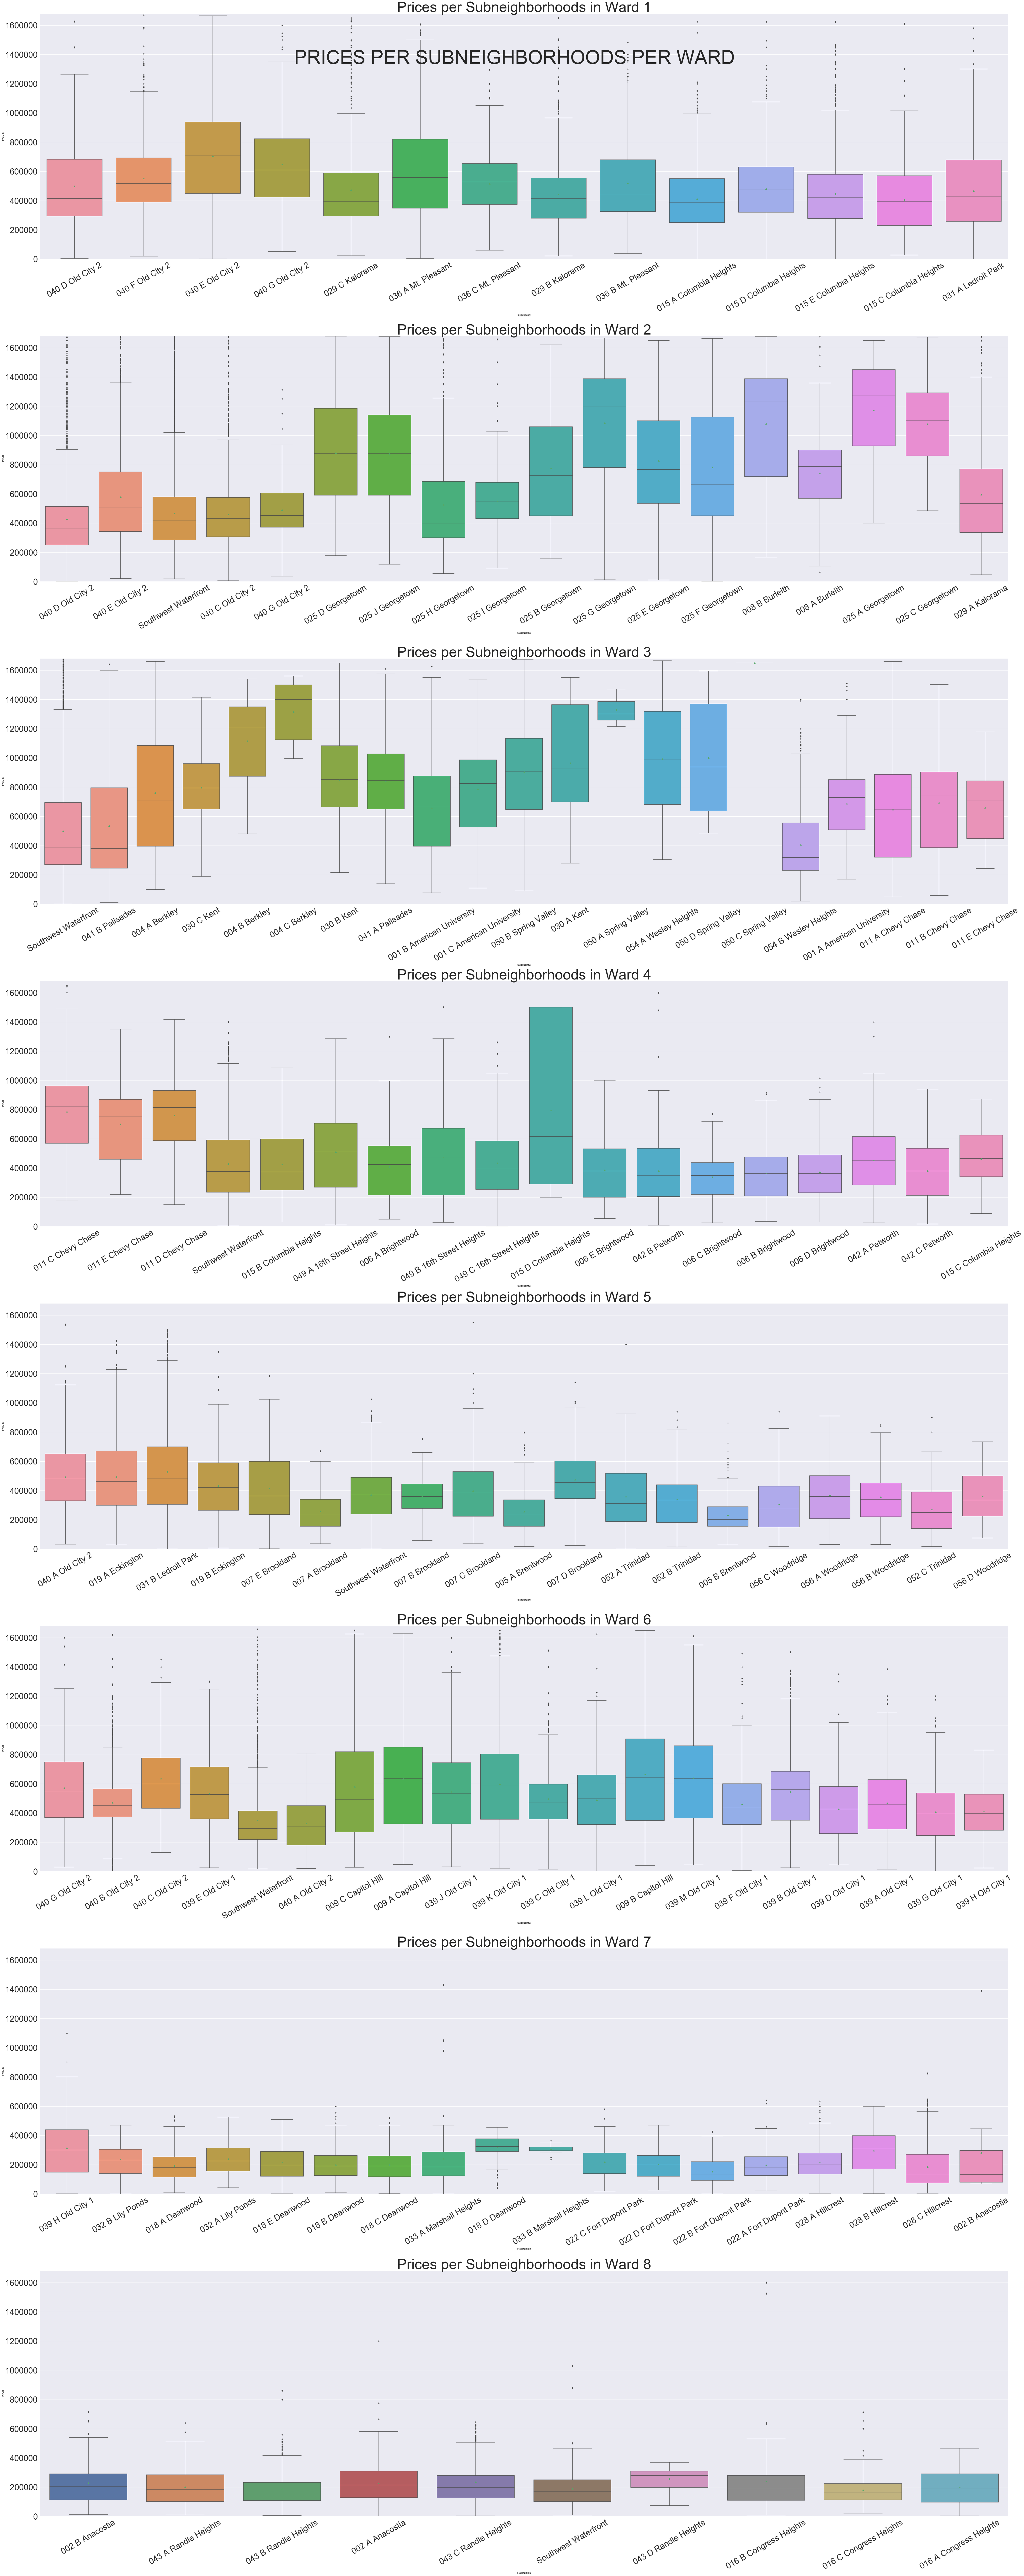

In [15]:
onedf = finaldf[(finaldf['WARD']=='Ward 1')]
twodf = finaldf[(finaldf['WARD']=='Ward 2')]
threedf = finaldf[(finaldf['WARD']=='Ward 3')]
fourdf = finaldf[(finaldf['WARD']=='Ward 4')]
fivedf = finaldf[(finaldf['WARD']=='Ward 5')]
sixdf = finaldf[(finaldf['WARD']=='Ward 6')]
sevendf = finaldf[(finaldf['WARD']=='Ward 7')]
eightdf = finaldf[(finaldf['WARD']=='Ward 8')]

fig, axarr = plt.subplots(8, 1, sharey=True, figsize=(60, 150))
fig.suptitle('PRICES PER SUBNEIGHBORHOODS PER WARD', fontsize=80)   
for i in range(8):
    axarr[i].set_ylim(0, ((max(finaldf.PRICE))+1))
       
zero = sns.boxplot(x='SUBNBHD', y='PRICE', data=onedf, ax=axarr[0], showmeans=True)
axarr[0].set_title("Prices per Subneighborhoods in Ward 1", size=60)             
zero.tick_params(axis= 'x', labelsize=35, rotation=30)
zero.tick_params(axis= 'y', labelsize=35)

one = sns.boxplot(x='SUBNBHD', y='PRICE', data=twodf, ax=axarr[1], showmeans=True)
axarr[1].set_title("Prices per Subneighborhoods in Ward 2", size=60)             
one.tick_params(axis= 'x', labelsize=35, rotation=30)
one.tick_params(axis= 'y', labelsize=35)
                   
two = sns.boxplot(x='SUBNBHD', y='PRICE', data=threedf, ax=axarr[2], showmeans=True)
axarr[2].set_title("Prices per Subneighborhoods in Ward 3", size=60)             
two.tick_params(axis= 'x', labelsize=35, rotation=30)
two.tick_params(axis= 'y', labelsize=35)
                   
three = sns.boxplot(x='SUBNBHD', y='PRICE', data=fourdf, ax=axarr[3], showmeans=True)
axarr[3].set_title("Prices per Subneighborhoods in Ward 4", size=60)             
three.tick_params(axis= 'x', labelsize=35, rotation=30)
three.tick_params(axis= 'y', labelsize=35)
                   
four = sns.boxplot(x='SUBNBHD', y='PRICE', data=fivedf, ax=axarr[4], showmeans=True)
axarr[4].set_title("Prices per Subneighborhoods in Ward 5", size=60)             
four.tick_params(axis= 'x', labelsize=35, rotation=30)
four.tick_params(axis= 'y', labelsize=35)
                   
five = sns.boxplot(x='SUBNBHD', y='PRICE', data=sixdf, ax=axarr[5], showmeans=True)
axarr[5].set_title("Prices per Subneighborhoods in Ward 6", size=60)             
five.tick_params(axis= 'x', labelsize=35, rotation=30)
five.tick_params(axis= 'y', labelsize=35)    

six = sns.boxplot(x='SUBNBHD', y='PRICE', data=sevendf, ax=axarr[6], showmeans=True)
axarr[6].set_title("Prices per Subneighborhoods in Ward 7", size=60)             
six.tick_params(axis= 'x', labelsize=35, rotation=30)
six.tick_params(axis= 'y', labelsize=35)
                   
seven = sns.boxplot(x='SUBNBHD', y='PRICE', data=eightdf, ax=axarr[7], showmeans=True)
axarr[7].set_title("Prices per Subneighborhoods in Ward 8", size=60)             
seven.tick_params(axis= 'x', labelsize=35, rotation=30)
seven.tick_params(axis= 'y', labelsize=35)
    
plt.tight_layout()

#### TAKEAWAYS:
* Wards 7 and 8 have the lowest prices
* Neighborhoods and Subneighborhoods show more explicit differences in price within different wards. 

### STORIES AND PRICE:

Text(0.5, 0, 'STORIES')

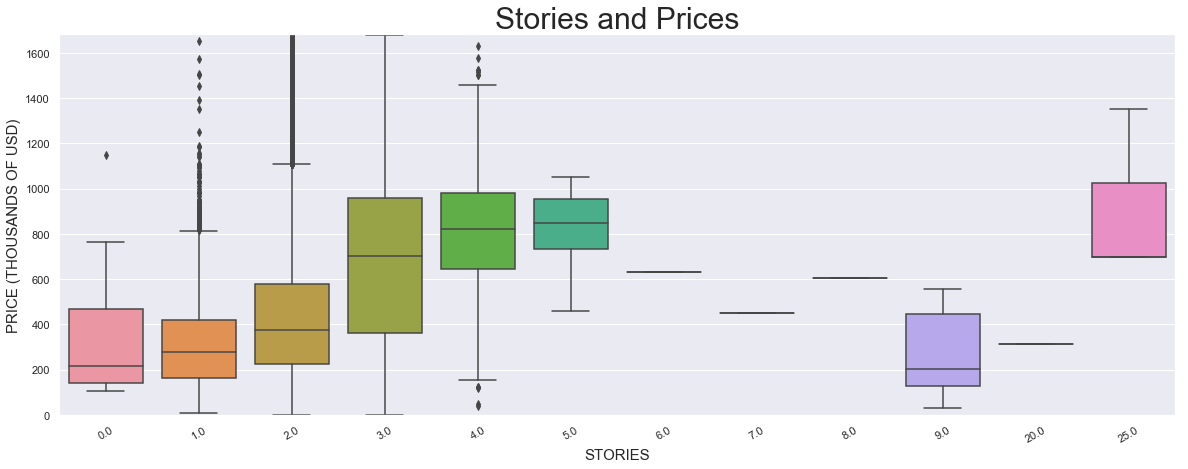

In [31]:
sns.set()
plt.figure(figsize=(20, 7))
g = sns.boxplot(x=finaldf.STORIES, y=price_thousands)
g.set(ylim=(0, max(price_thousands)))
g.tick_params(axis='x', rotation=30)
plt.title("Stories and Prices", size=30)
plt.ylabel('PRICE (THOUSANDS OF USD)', size=15)
plt.xlabel('STORIES', size=15)

In [17]:
finaldf.STORIES.value_counts().sort_index()

0.0        11
1.0      1879
2.0     83137
3.0      4557
4.0       139
5.0         8
6.0         1
7.0         1
8.0         1
9.0        14
20.0        1
25.0        3
Name: STORIES, dtype: int64

#### TAKEAWAYS:
* Prices increase with buildings up to five floors.
* We do not know much about the prices for high-rise buildings, as we only have less than 25 samples.

### GRADES AND PRICE:

Text(0.5, 0, 'GRADE')

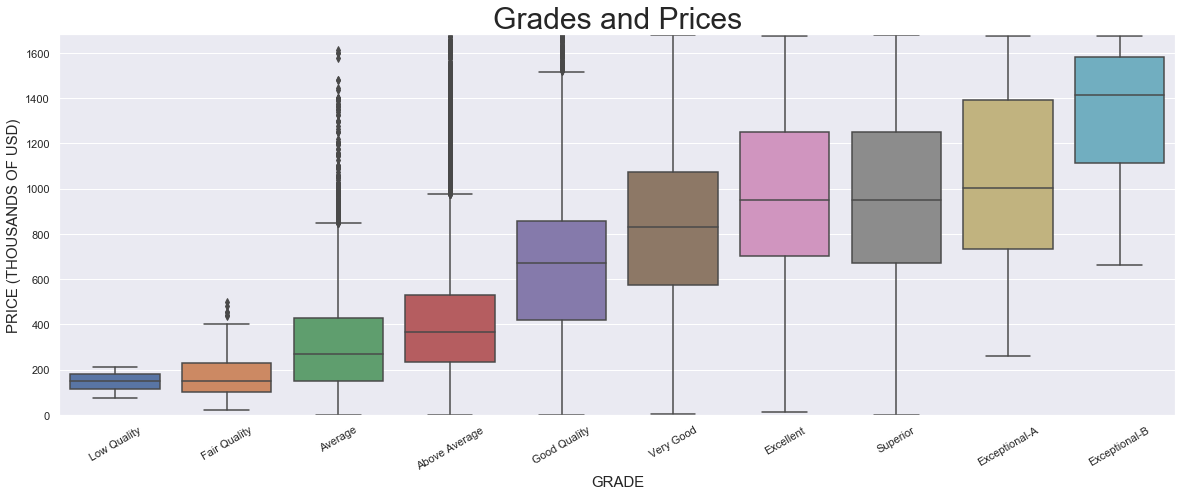

In [32]:
cat_values=pd.api.types.CategoricalDtype(
            categories=['Low Quality', 'Fair Quality', 'Average', 'Above Average', 'Good Quality', \
            'Very Good', 'Excellent', 'Superior', 'Exceptional-A', 'Exceptional-B'], ordered=True)
finaldf.GRADE = finaldf['GRADE'].astype(cat_values)

sns.set()
plt.figure(figsize=(20, 7))
g = sns.boxplot(x=finaldf.GRADE, y=price_thousands)
g.set(ylim=(0, max(price_thousands)))
g.tick_params(axis='x', rotation=30)
plt.title("Grades and Prices", size=30)
plt.ylabel('PRICE (THOUSANDS OF USD)', size=15)
plt.xlabel('GRADE', size=15)

#### TAKEAWAYS:
* GRADE has a very significant impact on price. 
* Price correlates directly with each step in grade.

### ROOMS AND PRICE:

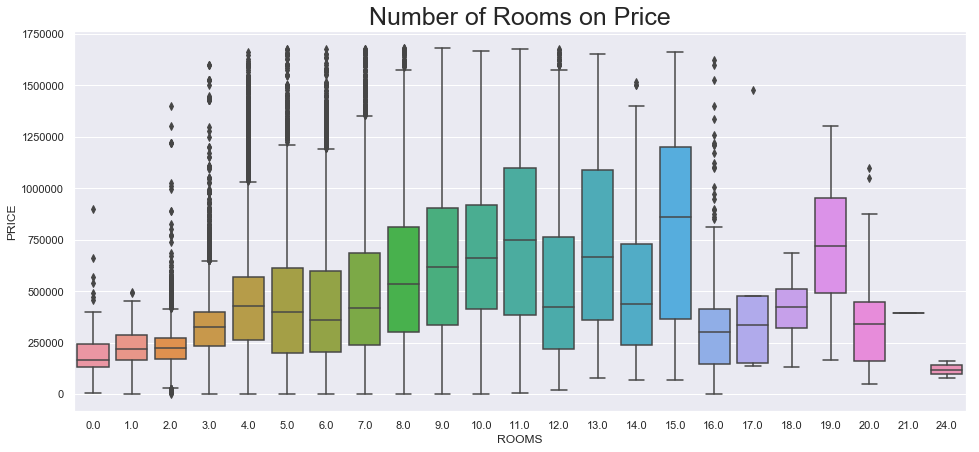

In [33]:
plt.figure(figsize=(16,7))
plt.title('Number of Rooms on Price', size=25)
sns.boxplot(x='ROOMS', y='PRICE', data=finaldf)

#### TAKEAWAYS:
* Prices increase up to 11 rooms